In [ ]:
%pylab inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from sklearn.metrics import pairwise_distances, davies_bouldin_score,silhouette_score

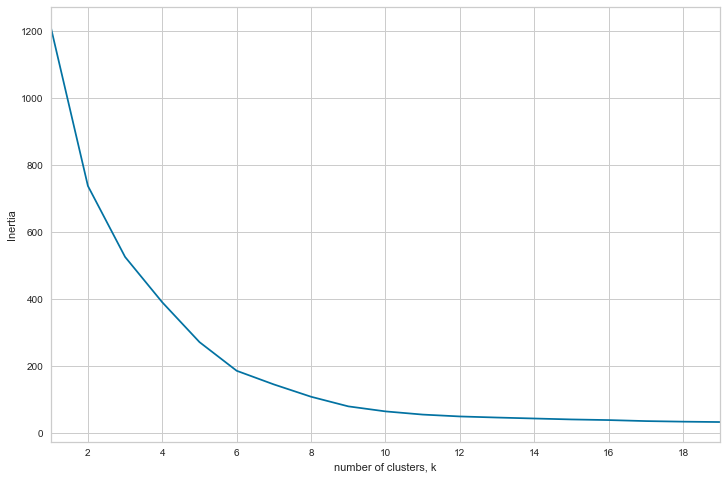

In [54]:
inertias = []
sizes = range(1, 20)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(titanic_mms)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(12, 8))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("number of clusters, k")
ax.set_ylabel("Inertia")
plt.show()

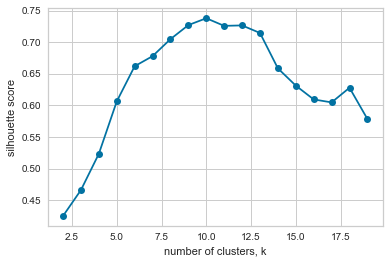

In [55]:
kl = range(2, 20)

silhouette = []

for i in kl:
    model = KMeans(n_clusters=i)
    model.fit(titanic_mms)
    silhouette.append(silhouette_score(titanic_mms,
                                       model.predict(titanic_mms)))

plt.plot(kl, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.show()

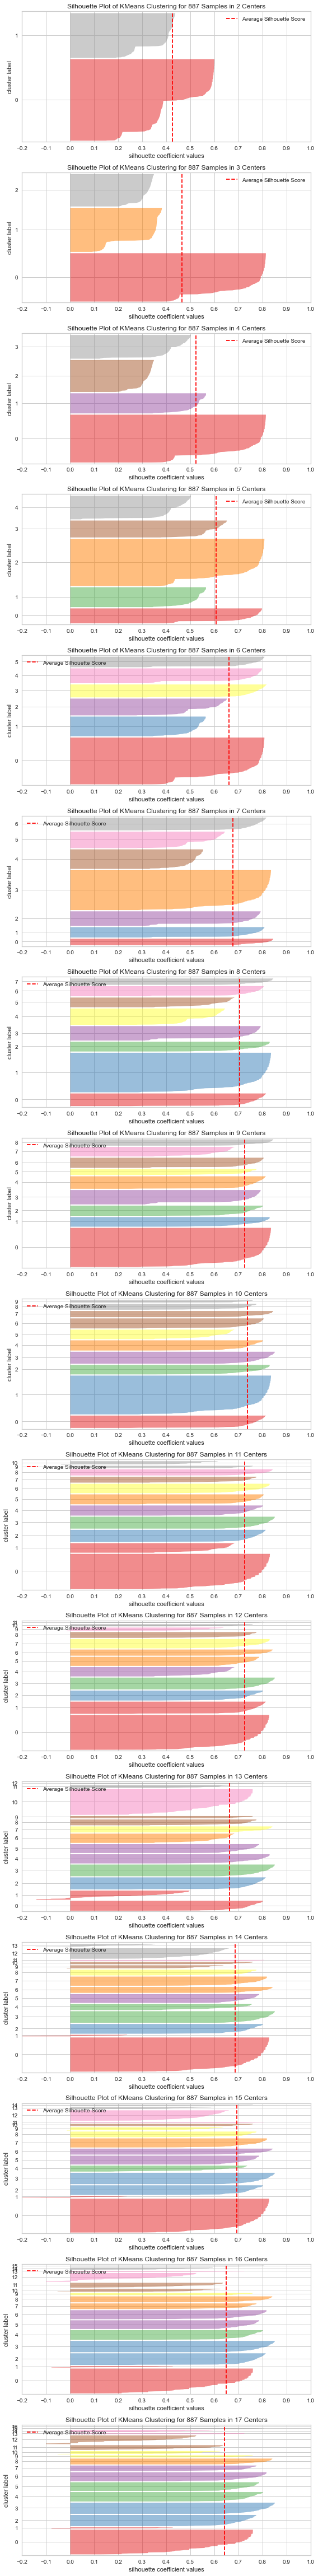

In [56]:
fig, axes = plt.subplots(16, 1, figsize=(8, 64))
axes = axes.reshape(16)

for i, k in enumerate(range(2, 18)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(titanic_mms)
    sil.finalize()
    ax.set_xlim(-0.2, 1)
    
plt.tight_layout()
plt.show()

In [57]:
model = KMeans(10)
model.fit(titanic_mms)
model.cluster_centers_
labels_KMeans = model.labels_

print("silhouette_score = " + str(metrics.silhouette_score(titanic_mms,labels_KMeans)))
print("davies_bouldin_score = " + str(davies_bouldin_score(titanic_mms,labels_KMeans)))
print("calinski_harabasz_score = " + str(metrics.calinski_harabasz_score(titanic_mms,labels_KMeans)))

silhouette_score = 0.7379044313954665
davies_bouldin_score = 0.41725061142761044
calinski_harabasz_score = 1699.0942757792368


In [79]:
unique_values = pd.DataFrame(np.transpose(np.unique(model.labels_, 
                    return_counts=True)), 
                   columns=["cluster_id","unique_obs"])
                   
cluster_analisys = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_).round(10), 
             columns=titanic_num_ohe.columns)
             
Titanic_cluster_info = (pd.concat([unique_values, cluster_analisys], axis=1))

In [80]:
Titanic_cluster_info

,cluster_id,unique_obs,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,47,1.000000,22.242979,0.340426,0.297872,15.579696,-0.0,1.0,-0.0,-0.0,1.0
1,1,94,0.968085,35.255319,0.553191,0.457447,106.125798,1.0,0.0,1.0,0.0,0.0
2,2,296,-0.000000,27.141892,0.530405,0.216216,12.237497,0.0,1.0,-0.0,0.0,1.0
3,3,72,1.000000,20.868056,0.500000,0.500000,12.464526,1.0,0.0,-0.0,0.0,1.0
4,4,91,0.000000,33.000000,0.307692,0.142857,19.488965,-0.0,1.0,0.0,1.0,0.0
5,5,77,-0.000000,44.292208,0.272727,0.259740,62.894910,-0.0,1.0,1.0,0.0,-0.0
6,6,76,0.921053,28.980263,0.486842,0.605263,21.970121,1.0,0.0,-0.0,1.0,-0.0
7,7,72,-0.000000,23.402778,1.291667,1.097222,19.773093,1.0,0.0,-0.0,0.0,1.0
8,8,45,1.000000,36.753778,0.377778,0.311111,74.637320,-0.0,1.0,1.0,-0.0,-0.0
9,9,17,1.000000,17.078235,0.529412,0.647059,21.095100,-0.0,1.0,0.0,1.0,0.0
